In [1]:
import requests

csv_data_dl = requests.get("https://raw.githubusercontent.com/microsoft/msticpy/main/tests/testdata/az_net_flows.csv")
with open("network_traffic.csv", 'wb') as f:
    f.write(csv_data_dl.content)

In [2]:
import pandas as pd

network_traffic_df = pd.read_csv("network_traffic.csv")
network_traffic_df.head()

,Unnamed: 0,TenantId,TimeGenerated,FlowStartTime,FlowEndTime,FlowIntervalEndTime,FlowType,ResourceGroup,VMName,VMIPAddress,...,DestPort,FlowDirection,AllowedOutFlows,AllowedInFlows,DeniedInFlows,DeniedOutFlows,RemoteRegion,VMRegion,AllExtIPs,TotalAllowedFlows
0,881,52b1ab41-869e-4138-9e40-2a4457f09bf0,2019-02-12 14:22:40.697,2019-02-12 13:00:07.000,2019-02-12 13:45:08.000,2019-02-12 14:00:00.000,AzurePublic,asihuntomsworkspacerg,msticalertswin1,10.0.3.5,...,443.0,O,4.0,0.0,0.0,0.0,eastus2,eastus,65.55.44.109,4.0
1,877,52b1ab41-869e-4138-9e40-2a4457f09bf0,2019-02-12 14:22:40.681,2019-02-12 13:00:48.000,2019-02-12 13:58:33.000,2019-02-12 14:00:00.000,AzurePublic,asihuntomsworkspacerg,msticalertswin1,10.0.3.5,...,443.0,O,18.0,0.0,0.0,0.0,canadacentral,eastus,13.71.172.128,18.0
2,876,52b1ab41-869e-4138-9e40-2a4457f09bf0,2019-02-12 14:22:40.681,2019-02-12 13:00:48.000,2019-02-12 13:58:33.000,2019-02-12 14:00:00.000,AzurePublic,asihuntomsworkspacerg,msticalertswin1,10.0.3.5,...,443.0,O,18.0,0.0,0.0,0.0,canadacentral,eastus,13.71.172.130,18.0
3,879,52b1ab41-869e-4138-9e40-2a4457f09bf0,2019-02-12 14:22:40.681,2019-02-12 13:10:56.000,2019-02-12 13:55:57.000,2019-02-12 14:00:00.000,AzurePublic,asihuntomsworkspacerg,msticalertswin1,10.0.3.5,...,443.0,O,2.0,0.0,0.0,0.0,southcentralus,eastus,40.124.45.19,2.0
4,875,52b1ab41-869e-4138-9e40-2a4457f09bf0,2019-02-12 14:22:40.681,2019-02-12 13:22:20.000,2019-02-12 13:22:20.000,2019-02-12 14:00:00.000,AzurePublic,asihuntomsworkspacerg,msticalertswin1,10.0.3.5,...,443.0,O,1.0,0.0,0.0,0.0,centralus,eastus,104.43.212.12,1.0


In [3]:
network_traffic_df.iloc[0].T

Unnamed: 0                                              881
TenantId               52b1ab41-869e-4138-9e40-2a4457f09bf0
TimeGenerated                       2019-02-12 14:22:40.697
FlowStartTime                       2019-02-12 13:00:07.000
FlowEndTime                         2019-02-12 13:45:08.000
FlowIntervalEndTime                 2019-02-12 14:00:00.000
FlowType                                        AzurePublic
ResourceGroup                         asihuntomsworkspacerg
VMName                                      msticalertswin1
VMIPAddress                                        10.0.3.5
PublicIPs                                  ['65.55.44.109']
SrcIP                                                   NaN
DestIP                                                  NaN
L4Protocol                                                T
L7Protocol                                            https
DestPort                                              443.0
FlowDirection                           

In [4]:
ips = network_traffic_df["AllExtIPs"].unique()
ips

array(['65.55.44.109', '13.71.172.128', '13.71.172.130', '40.124.45.19',
       '104.43.212.12', '40.77.232.95', '13.107.4.50', '40.77.228.69',
       '172.217.15.99', '40.85.232.64', '20.38.98.100', '23.96.64.84',
       '65.55.44.108', '131.107.147.209', '10.0.3.4', '10.0.3.5',
       '13.82.152.48', '8.249.241.254', '40.77.226.250', '13.65.107.32',
       '13.67.143.117', '52.165.170.112', '52.173.28.179',
       '52.168.138.145', '13.68.93.109', '65.52.108.92', '23.48.36.78',
       '23.223.3.100', '205.185.216.42', '13.83.149.5', '13.83.148.235',
       '8.253.45.249', '72.21.91.29', '72.21.81.240', '168.62.32.212',
       '40.121.3.131', '52.239.152.10', '40.87.63.92', '40.80.145.38',
       '23.47.27.169', '65.55.163.78', '172.217.15.78', '65.55.163.76',
       '172.217.8.3', '13.74.179.117', '90.130.70.73', '65.55.252.190',
       '40.69.153.67', '99.84.104.63', '157.55.134.136', '72.21.81.200',
       '204.79.197.200', '99.84.106.178', '23.3.13.106', '99.84.106.27',
       '23

In [5]:
import os
otx_api_key = os.environ["OTX_KEY"]
ip = ips[0]
url = f"https://otx.alienvault.com/api/v1/indicators/IPv4/{ip}/general"
headers = {"X-OTX-API-KEY": otx_api_key}
otx_response = requests.get(url, headers=headers)
otx_response.status_code

KeyError: 'OTX_KEY'

In [ ]:
otx_response.json()

{'whois': 'http://whois.domaintools.com/65.55.44.109',
 'reputation': 0,
 'indicator': '65.55.44.109',
 'type': 'IPv4',
 'type_title': 'IPv4',
 'base_indicator': {'id': 315071645,
  'indicator': '65.55.44.109',
  'type': 'IPv4',
  'title': '',
  'description': '',
  'content': '',
  'access_type': 'public',
  'access_reason': ''},
 'pulse_info': {'count': 10,
  'pulses': [{'id': '622136221b98e828da5b9d4e',
    'name': 'San Jose County Ca',
    'description': '',
    'modified': '2022-04-02T00:04:50.405000',
    'created': '2022-03-03T21:41:54.243000',
    'tags': [],
    'references': ['San Jose County Ca.pdf'],
    'public': 1,
    'adversary': '',
    'targeted_countries': ['United States of America'],
    'malware_families': [],
    'attack_ids': [],
    'industries': ['Government'],
    'TLP': 'white',
    'cloned_from': None,
    'export_count': 0,
    'upvotes_count': 0,
    'downvotes_count': 0,
    'votes_count': 0,
    'locked': False,
    'pulse_source': 'web',
    'validator

In [ ]:
otx_series = pd.Series(otx_response.json())
otx_series[['reputation', 'pulse_info', 'asn', 'city', 'country_code']]

reputation                                                      0
pulse_info      {'count': 10, 'pulses': [{'id': '622136221b98e...
asn                                  AS8075 microsoft corporation
city                                                      Boydton
country_code                                                   US
dtype: object

In [ ]:
pulses_df = pd.DataFrame(otx_series['pulse_info']['pulses'])
pulses_df

,id,name,description,modified,created,tags,references,public,adversary,targeted_countries,...,is_subscribing,subscriber_count,modified_text,is_modified,groups,in_group,threat_hunter_scannable,threat_hunter_has_agents,related_indicator_type,related_indicator_is_active
0,622136221b98e828da5b9d4e,San Jose County Ca,,2022-04-02T00:04:50.405000,2022-03-03T21:41:54.243000,[],[San Jose County Ca.pdf],1,,[United States of America],...,None,240,101 days ago,True,[],False,True,1,IPv4,0
1,61b7a20314f8900a44524960,IOCs - 202112132041,For complete list please visit https://apd.alt...,2022-01-12T19:04:10.915000,2021-12-13T19:41:55.119000,[],[],1,,[],...,None,305,181 days ago,True,[],False,True,1,IPv4,0
2,61b4fefcac7adf78d6db6663,IOCs - 202112112041,For complete list please visit https://apd.alt...,2022-01-10T19:02:36.240000,2021-12-11T19:41:48.384000,[],[],1,,[],...,None,303,183 days ago,True,[],False,True,1,IPv4,0
3,614b9b06113e3baafabb190d,IOCs - 2021922145,For complete list please visit https://apd.alt...,2021-10-22T21:02:21.004000,2021-09-22T21:07:18.201000,[],[],1,,[],...,None,302,263 days ago,True,[],False,True,1,IPv4,0
4,6145287e2155532a7302bc71,IOCs - 20219171642,For complete list please visit https://apd.alt...,2021-10-18T00:04:38.885000,2021-09-17T23:45:02.002000,[],[],1,,[],...,None,306,267 days ago,True,[],False,True,1,IPv4,0
5,6115baf893de8fbc97c48244,IOCs - 2021813219,Complete dataset of IOCs from OSINT analysis: ...,2021-09-12T00:04:22.766000,2021-08-13T00:21:12.772000,[],[],1,,[],...,None,310,304 days ago,True,[],False,True,1,IPv4,0
6,60f993d2b9b2b3415f6a3f0e,ExtremeTech - ExtremeTech is the Web&#039;s to...,In Case You Missed It: a round-up of interesti...,2021-08-22T00:00:47.694000,2021-07-22T15:50:42.542000,[HTTP Scans RECORD VALUE Header\tHTTP/1.1 200 ...,"[http://extremetech.com/ - malw scr 80/100, ht...",1,,"[Australia, Bonaire, Sint Eustatius and Saba, ...",...,None,259,325 days ago,True,[],False,True,1,IPv4,0
7,60fae6564fd8906ff1900d55,game-assistant3.exe - update.iobit.com/infofi...,The full list of names and addresses for the m...,2021-08-22T00:00:47.694000,2021-07-23T15:55:02.175000,"[dism provider, config, malicious, persistence...",[https://hybrid-analysis.com/sample/c7273e9b4b...,1,,[],...,None,260,325 days ago,True,[],False,True,1,IPv4,0
8,6041f1285481f49d664d2c42,IOCs - 202135951,For complete list please visit https://apd.alt...,2021-04-04T08:01:40.569000,2021-03-05T08:51:52.327000,[],[],1,,[],...,None,304,464 days ago,True,[],False,True,1,IPv4,0
9,5a6fb1a3c9734f2ba874ad7e,RiskDiscovery HoneyDB sensors feeds - 2018-01-29,,2018-01-29T23:43:31.618000,2018-01-29T23:43:31.618000,[],[],1,,[],...,None,267,1625 days ago,False,[],False,True,1,IPv4,1


In [ ]:
def row_style(row):
    if row.related_indicator_is_active == 1:
        return pd.Series('background-color: red', row.index)
    else:
        return pd.Series('background-color: none', row.index)

pulses_df.style.apply(row_style, axis=1)

,id,name,description,modified,created,tags,references,public,adversary,targeted_countries,malware_families,attack_ids,industries,TLP,cloned_from,export_count,upvotes_count,downvotes_count,votes_count,locked,pulse_source,validator_count,comment_count,follower_count,vote,author,indicator_type_counts,indicator_count,is_author,is_subscribing,subscriber_count,modified_text,is_modified,groups,in_group,threat_hunter_scannable,threat_hunter_has_agents,related_indicator_type,related_indicator_is_active
0,622136221b98e828da5b9d4e,San Jose County Ca,,2022-04-02T00:04:50.405000,2022-03-03T21:41:54.243000,[],['San Jose County Ca.pdf'],1,,['United States of America'],[],[],['Government'],white,None,0,0,0,0,False,web,0,0,0,0,"{'username': 'Kailula4', 'id': '131997', 'avatar_url': 'https://otx.alienvault.com/assets/images/default-avatar.png', 'is_subscribed': False, 'is_following': False}","{'hostname': 1203, 'domain': 374, 'URL': 62, 'FileHash-SHA256': 1906}",3545,False,None,240,101 days ago,True,[],False,True,1,IPv4,0
1,61b7a20314f8900a44524960,IOCs - 202112132041,For complete list please visit https://apd.altervista.org/,2022-01-12T19:04:10.915000,2021-12-13T19:41:55.119000,[],[],1,,[],[],[],[],green,None,9,0,0,0,False,api,0,0,0,0,"{'username': 'AlessandroFiori', 'id': '91912', 'avatar_url': '/otxapi/users/avatar_image/media/avatars/user_91912/resized/80/avatar_2b1b2b88b6.png', 'is_subscribed': False, 'is_following': False}","{'URI': 1852, 'FilePath': 1852, 'Mutex': 1852, 'YARA': 1852, 'URL': 12729, 'FileHash-SHA256': 797, 'domain': 142, 'hostname': 271, 'FileHash-SHA1': 4564}",25911,False,None,305,181 days ago,True,[],False,True,1,IPv4,0
2,61b4fefcac7adf78d6db6663,IOCs - 202112112041,For complete list please visit https://apd.altervista.org/,2022-01-10T19:02:36.240000,2021-12-11T19:41:48.384000,[],[],1,,[],[],[],[],green,None,3,0,0,0,False,api,0,0,0,0,"{'username': 'AlessandroFiori', 'id': '91912', 'avatar_url': '/otxapi/users/avatar_image/media/avatars/user_91912/resized/80/avatar_2b1b2b88b6.png', 'is_subscribed': False, 'is_following': False}","{'URI': 1790, 'FilePath': 1790, 'Mutex': 1790, 'YARA': 1790, 'URL': 13091, 'FileHash-SHA256': 799, 'domain': 126, 'hostname': 240, 'FileHash-SHA1': 4556}",25972,False,None,303,183 days ago,True,[],False,True,1,IPv4,0
3,614b9b06113e3baafabb190d,IOCs - 2021922145,For complete list please visit https://apd.altervista.org/,2021-10-22T21:02:21.004000,2021-09-22T21:07:18.201000,[],[],1,,[],[],[],[],green,None,8,0,0,0,False,api,0,0,0,0,"{'username': 'AlessandroFiori', 'id': '91912', 'avatar_url': '/otxapi/users/avatar_image/media/avatars/user_91912/resized/80/avatar_2b1b2b88b6.png', 'is_subscribed': False, 'is_following': False}","{'URI': 1795, 'FilePath': 1795, 'Mutex': 1795, 'YARA': 1795, 'URL': 9952, 'FileHash-SHA256': 800, 'domain': 144, 'hostname': 230, 'FileHash-SHA1': 4407}",22713,False,None,302,263 days ago,True,[],False,True,1,IPv4,0
4,6145287e2155532a7302bc71,IOCs - 20219171642,For complete list please visit https://apd.altervista.org/,2021-10-18T00:04:38.885000,2021-09-17T23:45:02.002000,[],[],1,,[],[],[],[],green,None,19,0,0,0,False,api,0,0,0,0,"{'username': 'AlessandroFiori', 'id': '91912', 'avatar_url': '/otxapi/users/avatar_image/media/avatars/user_91912/resized/80/avatar_2b1b2b88b6.png', 'is_subscribed': False, 'is_following': False}","{'URI': 1849, 'FilePath': 1849, 'Mutex': 1849, 'YARA': 1849, 'URL': 14544, 'FileHash-SHA256': 2535, 'hostname': 997, 'domain': 1538, 'FileHash-SHA1': 4668, 'CVE': 4, 'FileHash-MD5': 278}",31960,False,None,306,267 days ago,True,[],False,True,1,IPv4,0
5,6115baf893de8fbc97c48244,IOCs - 2021813219,"Complete dataset of IOCs from OSINT analysis: Includes generic attacks, botnets, specific target and specific Ransomware (LockBit)",2021-09-12T00:04:22.766000,2021-08-13T00:21:12.772000,[],[],1,,[],[],[],[],green,None,32,0,0,0,False,api,0,0,0,0,"{'username': 'AlessandroFiori', 'id': '91912', 'avatar_url': '/otxapi/users/avatar_image/media/avatars/user_91912/resized/

<AxesSubplot:xlabel='TimeGenerated'>

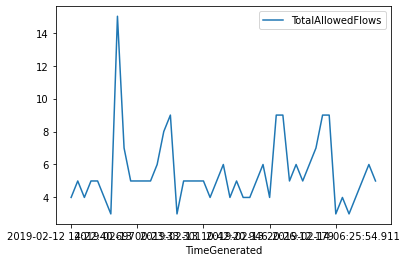

In [ ]:
network_traffic_df[network_traffic_df["AllExtIPs"] == ips[0]].plot(y="TotalAllowedFlows", x="TimeGenerated")